In [2]:
from pycaret.classification import *
import pandas as pd
import numpy as np

In [3]:
path = r"C:\Users\georg\OneDrive\Research_Rajapakse\Master Table\Master_FINAL_1.26.23.csv"
data = pd.read_csv(path)

In [3]:
data

,subject_id,hadm_id,admittime,Earliest for subject_id,Earliest Admission Flag,Earliest SID for that patient,dischtime,LoS_days,anchor_age,anchor_year,birth_year,admit_year,age,admission_type,admission_location,admission_location_text,insurance,marital_status,ethnicity,ethnicity_text,gender,gender_text,51221,51222,51248,51249,51250,51265,51277,51279,51301,51237,50868,50882,50893,50902,50912,50960,50970,50971,50983,51006,51476,51482,51491,51492,51493,51498,51514,51516,51143,51144,51146,51200,51244,51251,51254,51255,51256,51275,50861,50862,50863,50878,50883,50884,50885,50956,50935,50954,51274,50802,52172,50934,50947,51678,51133,52069,52073,52074,52075,50804,50817,50818,50819,50820,50821,50816,50826,50813,52023,50825,50808,51007,51078,51082,51093,51097,51100,51104,50964,51479,51214,51283,51009,50809,50993,51010,50911,50924,50925,50952,50953,50998,51484,51288,51257,51282,51137,51478,50949,50950,50951,52135,50867,50803,50806,50810,50811,50824,50822,50931,50910,51099,51102,50801,50815,50823,51466,50903,50904,50905,50907,51000,50908,50965,50994,50995,50930,50976,50889,50853,51501,51463,50975,51706,51233,52111,50827,51098,51613,51266,51752,50909,51003,50920,51260,50979,51103,50812,50955,50943,50942,51246,51506,50963,51268,50940,52033,51267,50828,51486,51519,51508,51252,51287,51296,50852,50887,50933,50919,51107,50941,50981,1 Year Mortality Flag
0,16893819,21509759,2/12/2199,2/12/2199,Y,2/12/2199,2/16/2199,4.13,31,2191,2160,2199,39,2,1,CLINIC REFERRAL,0,0,0,WHITE,0,F,27.80,9.10,30.5,32.70,93.00,126.00,16.30,2.98,3.3,1.10,14.00,27.00,9.10,100.00,0.90,1.70,3.8,3.40,138.00,12.00,846.31,1481.17,6.05,47.4,2684.3,1.02,1.46,2874.19,0.4,1.95,0.33,1.45,13.84,0.67,6.55,0.31,76.98,50.00,16.00,3.07,121.00,17.00,1.2,1.12,0.30,65.26,196.46,313.48,11.60,-0.65,55.80,6.00,0.00,9.00,1.28,0.03,0.11,0.81,8.93,25.88,88.6,44.21,5.77,7.36,133.21,55.14,502.46,2.07,-1,37.0,1.11,5.7,56.12,93.53,446.32,45.03,53.58,560.75,283.82,1682.92,382.66,2.71,15.25,135.16,3.3,725.16,7.08,896.0,11.31,40.53,218.46,168,12.34,56.58,2.34,0.07,-1,134.06,261.11,1028.22,232.51,0.76,98.2,25.12,103.36,30.46,10.14,136.17,4.13,97.00,558.52,1.33,67.14,474.23,9.05,79.75,-1,3.88,39.34,69.73,131.85,141.97,3.64,214.85,7.02,1.4,2.59,5.7,83.23,28.25,2319.78,-1,-1,-1,-1,-1,-1,-1,139.24,-1,-1,24.44,0.13,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,6103.67,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,6.46,-1,-1,-1,-1,-1,-1,0
1,19100396,28930685,6/21/2183,6/21/2183,Y,6/21/2183,6/23/2183,2.11,59,2183,2124,2183,59,1,2,PACU,1,1,0,WHITE,1,M,32.72,10.74,30.2,32.85,92.02,217.27,14.46,3.58,10.2,1.36,13.91,25.07,8.58,102.55,1.13,1.88,3.5,4.25,138.23,21.85,846.31,1481.17,6.05,47.4,2684.3,1.02,1.46,2874.19,0.4,1.95,0.33,1.45,13.84,0.67,6.55,0.31,76.98,32.05,44.27,3.07,111.06,63.94,1.2,1.12,0.88,65.26,196.46,313.48,14.93,-0.65,48.83,30.44,1.04,8.03,1.28,0.03,0.11,0.81,8.93,25.88,88.6,44.21,5.77,7.36,133.21,55.14,502.46,2.07,-1,37.0,1.11,5.7,56.12,93.53,446.32,45.03,53.58,560.75,283.82,1682.92,382.66,2.71,15.25,135.16,3.3,725.16,7.08,896.0,11.31,40.53,218.46,168,12.34,56.58,2.34,0.07,-1,134.06,261.11,1028.22,232.51,0.76,98.2,25.12,103.36,30.46,10.14,136.17,4.13,133.17,558.52,1.33,67.14,474.23,9.05,79.75,-1,3.88,39.34,69.73,131.85,141.97,3.64,214.85,7.02,1.4,2.59,5.7,83.23,28.25,2319.78,-1,-1,-1,-1,-1,-1,-1,139.24,-1,-1,24.44,0.13,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,6103.67,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,6.46,-1,-1,-1,-1,-1,-1,0
2,17078298,27295142,4/20/2119,4/20/2119,Y,4/20/2119,4/21/2119,1.02,91,2115,2024,2119,95,0,0,EMERGENCY ROOM,0,2,0,WHITE,1,M,32.72,10.74,30.2,32.85,92.02,217.27,14.46,3.58,10.2,1.36,13.91,25.07,8.58,102.55,1.13,1.88,3.5,4.25,138.23,21.85,846.31,1481.17,6.05,47.4,2684.3,1.02,1.46,2874.19,0.4,1.95,0.33,1.45,13.84,0.67,6.55,0.31,76.98,32.05,44.27,3.07,111.06,63.94,1.2,1.12,0.88,65.26,196.46,313.48,14.93,-0.65,48.83,30.44,1.04,8.03,1.28,0.03,0.11,0.81,8.93,25.88,88.6,44.21,5.77,7.36,133.21,55.14,502.46,2.07,-1,37.0,1.11,5.7,56.12,93.53,446.32,45.03,53.58,560.75,283.82,1682.92,382.66,2.71,15.25,135.16,3.3,725.16,7.08,896.0,1

In [4]:
data['1 Year Mortality Flag'] = data['1 Year Mortality Flag'].replace(-1,0)

In [5]:
# removing variables that not known at admission
data = data.drop(columns = ['subject_id','hadm_id','admittime', 'Earliest for subject_id','Earliest Admission Flag','Earliest SID for that patient','dischtime','LoS_days','anchor_age','anchor_year','birth_year','admit_year','admission_location_text','ethnicity_text','gender_text','51252','51233','50981','50941','51107','50919','50933','50887','50828','50940','50942','50943','50955','50812','51103','50979','50920','51752','51098','50827','51706','50975','52023','51752','50920'])

In [6]:
# NUMBER OF COLUMNS, BUT BEFORE CONVERTING SOME TO CATEGORIES
len(data.columns)-1

156

In [7]:
# INPUT DATA IS 156 FEATURES TOTAL: 149 LAB, 7 DEMOGRAPHIC
data

,age,admission_type,admission_location,insurance,marital_status,ethnicity,gender,51221,51222,51248,51249,51250,51265,51277,51279,51301,51237,50868,50882,50893,50902,50912,50960,50970,50971,50983,51006,51476,51482,51491,51492,51493,51498,51514,51516,51143,51144,51146,51200,51244,51251,51254,51255,51256,51275,50861,50862,50863,50878,50883,50884,50885,50956,50935,50954,51274,50802,52172,50934,50947,51678,51133,52069,52073,52074,52075,50804,50817,50818,50819,50820,50821,50816,50826,50813,50825,50808,51007,51078,51082,51093,51097,51100,51104,50964,51479,51214,51283,51009,50809,50993,51010,50911,50924,50925,50952,50953,50998,51484,51288,51257,51282,51137,51478,50949,50950,50951,52135,50867,50803,50806,50810,50811,50824,50822,50931,50910,51099,51102,50801,50815,50823,51466,50903,50904,50905,50907,51000,50908,50965,50994,50995,50930,50976,50889,50853,51501,51463,52111,51613,51266,50909,51003,51260,51246,51506,50963,51268,52033,51267,51486,51519,51508,51287,51296,50852,1 Year Mortality Flag
0,39,2,1,0,0,0,0,27.80,9.10,30.5,32.70,93.00,126.00,16.30,2.98,3.3,1.10,14.00,27.00,9.10,100.00,0.90,1.70,3.8,3.40,138.00,12.00,846.31,1481.17,6.05,47.4,2684.3,1.02,1.46,2874.19,0.4,1.95,0.33,1.45,13.84,0.67,6.55,0.31,76.98,50.00,16.00,3.07,121.00,17.00,1.2,1.12,0.30,65.26,196.46,313.48,11.60,-0.65,55.80,6.00,0.00,9.00,1.28,0.03,0.11,0.81,8.93,25.88,88.6,44.21,5.77,7.36,133.21,55.14,502.46,2.07,37.0,1.11,5.7,56.12,93.53,446.32,45.03,53.58,560.75,283.82,1682.92,382.66,2.71,15.25,135.16,3.3,725.16,7.08,896.0,11.31,40.53,218.46,168,12.34,56.58,2.34,0.07,-1,134.06,261.11,1028.22,232.51,0.76,98.2,25.12,103.36,30.46,10.14,136.17,4.13,97.00,558.52,1.33,67.14,474.23,9.05,79.75,-1,3.88,39.34,69.73,131.85,141.97,3.64,214.85,7.02,1.4,2.59,5.7,83.23,28.25,2319.78,-1,-1,139.24,-1,24.44,0.13,-1,-1,-1,6103.67,-1,-1,-1,-1,-1,-1,-1,-1,6.46,0
1,59,1,2,1,1,0,1,32.72,10.74,30.2,32.85,92.02,217.27,14.46,3.58,10.2,1.36,13.91,25.07,8.58,102.55,1.13,1.88,3.5,4.25,138.23,21.85,846.31,1481.17,6.05,47.4,2684.3,1.02,1.46,2874.19,0.4,1.95,0.33,1.45,13.84,0.67,6.55,0.31,76.98,32.05,44.27,3.07,111.06,63.94,1.2,1.12,0.88,65.26,196.46,313.48,14.93,-0.65,48.83,30.44,1.04,8.03,1.28,0.03,0.11,0.81,8.93,25.88,88.6,44.21,5.77,7.36,133.21,55.14,502.46,2.07,37.0,1.11,5.7,56.12,93.53,446.32,45.03,53.58,560.75,283.82,1682.92,382.66,2.71,15.25,135.16,3.3,725.16,7.08,896.0,11.31,40.53,218.46,168,12.34,56.58,2.34,0.07,-1,134.06,261.11,1028.22,232.51,0.76,98.2,25.12,103.36,30.46,10.14,136.17,4.13,133.17,558.52,1.33,67.14,474.23,9.05,79.75,-1,3.88,39.34,69.73,131.85,141.97,3.64,214.85,7.02,1.4,2.59,5.7,83.23,28.25,2319.78,-1,-1,139.24,-1,24.44,0.13,-1,-1,-1,6103.67,-1,-1,-1,-1,-1,-1,-1,-1,6.46,0
2,95,0,0,0,2,0,1,32.72,10.74,30.2,32.85,92.02,217.27,14.46,3.58,10.2,1.36,13.91,25.07,8.58,102.55,1.13,1.88,3.5,4.25,138.23,21.85,846.31,1481.17,6.05,47.4,2684.3,1.02,1.46,2874.19,0.4,1.95,0.33,1.45,13.84,0.67,6.55,0.31,76.98,32.05,44.27,3.07,111.06,63.94,1.2,1.12,0.88,65.26,196.46,313.48,14.93,-0.65,48.83,30.44,1.04,8.03,1.28,0.03,0.11,0.81,8.93,25.88,88.6,44.21,5.77,7.36,133.21,55.14,502.46,2.07,37.0,1.11,5.7,56.12,93.53,446.32,45.03,53.58,560.75,283.82,1682.92,382.66,2.71,15.25,135.16,3.3,725.16,7.08,896.0,11.31,40.53,218.46,168,12.34,56.58,2.34,0.07,-1,134.06,261.11,1028.22,232.51,0.76,98.2,25.12,103.36,30.46,10.14,136.17,4.13,133.17,558.52,1.33,67.14,474.23,9.05,79.75,-1,3.88,39.34,69.73,131.85,141.97,3.64,214.85,7.02,1.4,2.59,5.7,83.23,28.25,2319.78,-1,-1,139.24,-1,24.44,0.13,-1,-1,-1,6103.67,-1,-1,-1,-1,-1,-1,-1,-1,6.46,1
3,80,0,0,0,3,0,1,32.72,10.74,30.2,32.85,92.02,217.27,14.46,3.58,10.2,1.36,13.91,25.07,8.58,102.55,1.13,1.88,3.5,4.25,138.23,21.85,846.31,1481.17,6.05,47.4,2684.3,1.02,1.46,2874.19,0.4,1.95,0.33,1.45,13.84,0.67,6.55,0.31,76.98,32.05,44.27,3.07,111.06,63.94,1.2,1.12,0.88,65.26,196.46,313.48,14.93,-0.65,48.83,30.44,1.04,8.03,1.28,0.03,0.11,0.81,8.93,25.88,88.6,44.21,5.77,7.36,133.21,55.14,502.46,2.07,37.0,1.11,5.7,56.12,93.53,446.32,45.03,53.58,560.75,283.82,1682.92,382.66,2.71,15.2

In [13]:
# final_features = pd.Series(data.columns)
# final_features.to_csv(r'C:\Users\georg\OneDrive\Research_Rajapakse\Master Table\final_features.csv')

In [9]:
# from pycaret.datasets import get_data
# diabetes = get_data('diabetes')
# diabetes

In [ ]:
# diabetes_clf = setup(data = diabetes, target = 'Class variable')

In [ ]:
# # train a few models
# lr_db = create_model('lr')
# dt_db = create_model('dt')
# knn_db = create_model('knn')

# # blend models
# blender = blend_models([lr_db, dt_db, knn_db])

In [7]:
data = data.astype(float)
#data.to_csv(r'C:\Users\georg\OneDrive\Research_Rajapakse\Master Table\master_final_1.14.23.csv')

In [8]:
len(data.columns)

157

In [10]:
# Dropping an anomaly

In [9]:
clf1 = setup(data = data,
target = '1 Year Mortality Flag',
session_id = 123,
train_size=0.8,
silent = True,
categorical_features = ['admission_type','admission_location','insurance','marital_status','ethnicity','gender','51137','51466','51463','52111','51266','51260','51246','51506','51268','52033','51267','51486','51519','51508','51287','51296'],
remove_perfect_collinearity=False
)

,Description,Value
0,session_id,123
1,Target,1 Year Mortality Flag
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(3751, 157)"
5,Missing Values,False
6,Numeric Features,134
7,Categorical Features,22
8,Ordinal Features,False
9,High Cardinality Features,False


In [10]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8120,0.7995,0.2817,0.5967,0.3818,0.2878,0.3163,1.1890
lightgbm,Light Gradient Boosting Machine,0.8110,0.7998,0.3366,0.5738,0.4228,0.3194,0.3362,0.2820
rf,Random Forest Classifier,0.8083,0.7944,0.2011,0.6100,0.2975,0.2205,0.2668,0.4920
ada,Ada Boost Classifier,0.8013,0.7711,0.3383,0.5324,0.4117,0.3000,0.3119,0.3710
et,Extra Trees Classifier,0.8013,0.7769,0.1675,0.5755,0.2550,0.1797,0.2263,0.4540
ridge,Ridge Classifier,0.8010,0.0000,0.2140,0.5407,0.3042,0.2148,0.2464,0.0470
lr,Logistic Regression,0.7967,0.7380,0.1449,0.5339,0.2237,0.1508,0.1942,2.2040
lda,Linear Discriminant Analysis,0.7960,0.7426,0.2623,0.5069,0.3432,0.2385,0.2570,0.1410
dummy,Dummy Classifier,0.7930,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0220
knn,K Neighbors Classifier,0.7813,0.6437,0.1562,0.4365,0.2275,0.1316,0.1569,0.2650


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
# THIS SECTION CREATES INDIVIDUAL MODELS FOR CONSOLIDATED COEFFICIENT OUTPUT
# BE CAREFUL ABOUT ACCIDENTALLY USING THE WRONG CF#

In [11]:
lgbm  = create_model('lightgbm')
tuned_lightgbm = tune_model(lgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8267,0.7832,0.4286,0.6279,0.5094,0.4087,0.4197
1,0.8200,0.8516,0.3871,0.6000,0.4706,0.3682,0.3810
2,0.8500,0.8642,0.4355,0.7297,0.5455,0.4624,0.4845
3,0.8267,0.8138,0.3871,0.6316,0.4800,0.3831,0.3996
4,0.7800,0.8081,0.2258,0.4375,0.2979,0.1829,0.1970
5,0.8100,0.7649,0.3548,0.5641,0.4356,0.3285,0.3412
6,0.8133,0.8041,0.3065,0.5938,0.4043,0.3067,0.3303
7,0.7733,0.7583,0.2258,0.4118,0.2917,0.1702,0.1811
8,0.7733,0.7472,0.2742,0.4250,0.3333,0.2044,0.2115


In [12]:
rf  = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8100,0.7860,0.3016,0.5938,0.4000,0.3011,0.3256
1,0.8067,0.8242,0.2419,0.5769,0.3409,0.2492,0.2817
2,0.8233,0.8397,0.2581,0.6957,0.3765,0.2980,0.3480
3,0.8033,0.8150,0.2258,0.5600,0.3218,0.2304,0.2631
4,0.8300,0.8164,0.2419,0.7895,0.3704,0.3028,0.3743
5,0.7967,0.7895,0.1290,0.5333,0.2078,0.1384,0.1851
6,0.8167,0.8142,0.2097,0.6842,0.3210,0.2481,0.3067
7,0.8167,0.7184,0.2258,0.6667,0.3373,0.2600,0.3117
8,0.7767,0.7469,0.0806,0.3333,0.1299,0.0537,0.0718


In [13]:
# Tuned model does not work
# tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9500,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9500,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9500,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9500,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9500,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9467,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9467,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9467,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9467,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


In [13]:
et  = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7900,0.7631,0.1587,0.5000,0.2410,0.1555,0.1903
1,0.7967,0.7902,0.1613,0.5263,0.2469,0.1661,0.2053
2,0.8300,0.8105,0.3065,0.7037,0.4270,0.3448,0.3860
3,0.8033,0.8162,0.1774,0.5789,0.2716,0.1934,0.2391
4,0.8167,0.8052,0.1935,0.7059,0.3038,0.2358,0.3022
5,0.7767,0.7557,0.0968,0.3529,0.1519,0.0691,0.0885
6,0.8133,0.7880,0.1613,0.7143,0.2632,0.2024,0.2774
7,0.8100,0.7298,0.2258,0.6087,0.3294,0.2450,0.2861
8,0.7733,0.7246,0.1129,0.3500,0.1707,0.0778,0.0946


In [14]:
gbc  = create_model('gbc')
tuned_gbc = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8133,0.7867,0.3492,0.5946,0.4400,0.3370,0.3542
1,0.8400,0.8492,0.4355,0.6750,0.5294,0.4384,0.4537
2,0.8333,0.8529,0.3710,0.6765,0.4792,0.3898,0.4148
3,0.8167,0.8044,0.3710,0.5897,0.4554,0.3520,0.3657
4,0.8033,0.8046,0.3710,0.5349,0.4381,0.3236,0.3316
5,0.8067,0.7716,0.3226,0.5556,0.4082,0.3022,0.3182
6,0.7967,0.7902,0.2742,0.5152,0.3579,0.2502,0.2678
7,0.7733,0.7455,0.2742,0.4250,0.3333,0.2044,0.2115
8,0.8033,0.7550,0.2742,0.5484,0.3656,0.2642,0.2865


In [15]:
xtrain_cols = get_config('X_train').columns
coefficients_df = pd.DataFrame(xtrain_cols)
coefficients_df['lightgbm_coeffs']=tuned_lightgbm.feature_importances_
coefficients_df['rf_coeffs']= rf.feature_importances_
coefficients_df['et_coeffs']= et.feature_importances_
# Used GBC not tuned GBC because tuned decreased performance
coefficients_df['gbc_coeffs']=gbc.feature_importances_
coefficients_df.to_csv(r'C:\Users\georg\OneDrive\Research_Rajapakse\Analysis_of_features\coefficients_1.26.23.csv')

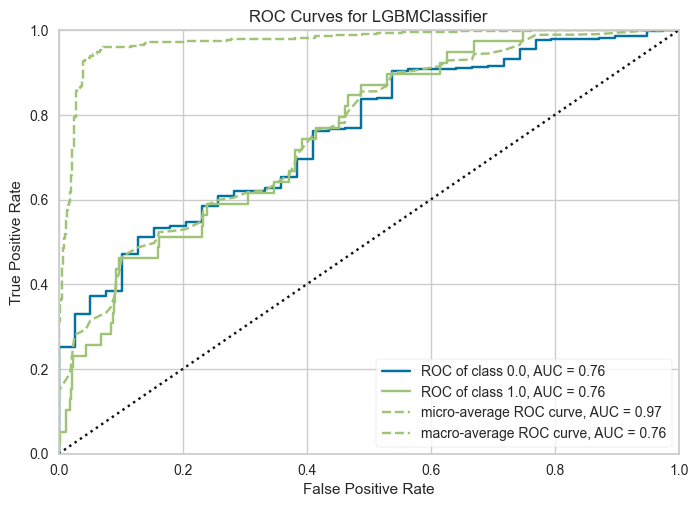

In [38]:
plot_model(tuned_lightgbm, plot = 'auc')

In [ ]:
# THIS SECTION IS TO ANALYZE THE QUALITY OF THE MODEL USING ONLY THE 10 FEATURES IN THE 

In [23]:
# Confirm the correct CF# was used first
evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [16]:
rftop10 = data[['age','50902','51277','50885','50983','51248','51249','51265','50970','51275','1 Year Mortality Flag']].copy()

In [18]:
clf2 = setup(data = rftop10,
target = '1 Year Mortality Flag',
session_id = 123,
train_size=0.8,
silent = True,
remove_perfect_collinearity=False
)

,Description,Value
0,session_id,123
1,Target,1 Year Mortality Flag
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(4060, 11)"
5,Missing Values,False
6,Numeric Features,10
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [20]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9480,0.7306,0.0928,0.5064,0.1490,0.1377,0.1920,0.0420
et,Extra Trees Classifier,0.9477,0.7783,0.0402,0.4333,0.0727,0.0673,0.1229,0.1430
ridge,Ridge Classifier,0.9474,0.0000,0.0114,0.2000,0.0216,0.0206,0.0466,0.0060
dummy,Dummy Classifier,0.9467,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0050
lr,Logistic Regression,0.9464,0.7001,0.0405,0.3500,0.0716,0.0642,0.1068,1.5270
rf,Random Forest Classifier,0.9464,0.7783,0.0402,0.2583,0.0674,0.0606,0.0890,0.1800
knn,K Neighbors Classifier,0.9449,0.5635,0.0173,0.1333,0.0305,0.0243,0.0384,0.0200
gbc,Gradient Boosting Classifier,0.9440,0.7897,0.1101,0.3794,0.1654,0.1472,0.1790,0.1640
lda,Linear Discriminant Analysis,0.9415,0.7015,0.0980,0.3305,0.1484,0.1278,0.1541,0.0070
svm,SVM - Linear Kernel,0.9412,0.0000,0.0294,0.1008,0.0441,0.0322,0.0382,0.0120


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [20]:
# Attempt at creating feature importances from blender
# Link: https://towardsdatascience.com/custom-implementation-of-feature-importance-for-your-voting-classifier-model-859b573ce0e0
# df = pd.DataFrame()
# df['Feature'] = X_train.columns
# df['Feature Importance'] = compute_feature_importance(voting_clf, [1, 1, 2])
# df.sort_values('Feature Importance', ascending=False)


In [14]:
top1_lgbm_model = setup(data = top1_lgbm,
target = '1 Year Mortality Flag',
numeric_imputation = 'mean',
train_size=0.8,
silent = True
)

,Description,Value
0,session_id,5957
1,Target,1 Year Mortality Flag
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(4060, 2)"
5,Missing Values,False
6,Numeric Features,1
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [15]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.9449,0.7237,0.0000,0.0000,0.0000,0.0000,0.0000,0.0050
ridge,Ridge Classifier,0.9449,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0060
qda,Quadratic Discriminant Analysis,0.9449,0.7236,0.0000,0.0000,0.0000,0.0000,0.0000,0.0080
lda,Linear Discriminant Analysis,0.9449,0.7233,0.0000,0.0000,0.0000,0.0000,0.0000,0.0050
dummy,Dummy Classifier,0.9449,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0050
lr,Logistic Regression,0.9443,0.7233,0.0000,0.0000,0.0000,-0.0012,-0.0027,0.6180
ada,Ada Boost Classifier,0.9443,0.6920,0.0000,0.0000,0.0000,-0.0012,-0.0027,0.0410
knn,K Neighbors Classifier,0.9427,0.5676,0.0281,0.1700,0.0477,0.0394,0.0565,0.0130
lightgbm,Light Gradient Boosting Machine,0.9427,0.6461,0.0167,0.1167,0.0290,0.0222,0.0327,0.0290
dt,Decision Tree Classifier,0.9415,0.5834,0.0222,0.1417,0.0381,0.0284,0.0405,0.0050


GaussianNB(priors=None, var_smoothing=1e-09)

In [16]:
lgbm  = create_model('lightgbm')
tuned_lightgbm = tune_model(lgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9446,0.7556,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9446,0.6541,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9446,0.7552,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9446,0.7599,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9446,0.6789,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9446,0.6495,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9446,0.7695,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9446,0.7166,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9475,0.7599,0.0000,0.0000,0.0000,0.0000,0.0000


In [17]:
save_model(tuned_lightgbm, 'tuned_lightgbm_top 1 feature') 

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='1 Year Mortality Flag',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,...
                                 colsample_bytree=1.0, feature_fraction=0.6,
                                 importance_type='split', learning_rate=0.0001,
                                 max_depth=-1, min_child_samples=31,
                                 min_chi

In [18]:
top5_lgbm = data[['51277','1 Year Mortality Flag','50863','50954','51006','50813']]
top5_lgbm_model = setup(data = top5_lgbm,
target = '1 Year Mortality Flag',
numeric_imputation = 'mean',
train_size=0.8,
silent = True
)
compare_models()
lgbm  = create_model('lightgbm')
tuned_lightgbm = tune_model(lgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9477,0.7811,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9477,0.7916,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9477,0.7376,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9477,0.8364,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9477,0.8457,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9477,0.8415,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9446,0.7983,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9446,0.7841,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9475,0.7340,0.0000,0.0000,0.0000,0.0000,0.0000


In [19]:
top20_lgbm = data[['51277','1 Year Mortality Flag','50863','50954','51006','50813','50878','51256','51275','50931','51274','50885','51082','51100','anchor_age','51249','50804','51222','51492','51265','51221']]
top20_lgbm_model = setup(data = top20_lgbm,
target = '1 Year Mortality Flag',
numeric_imputation = 'mean',
train_size=0.8,
silent = True
)
compare_models()
lgbm  = create_model('lightgbm')
tuned_lightgbm = tune_model(lgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9508,0.8554,0.0588,1.0000,0.1111,0.1059,0.2365
1,0.9477,0.8293,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9477,0.8650,0.0556,1.0000,0.1053,0.1000,0.2294
3,0.9477,0.8209,0.0556,1.0000,0.1053,0.1000,0.2294
4,0.9446,0.8831,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9508,0.8668,0.1111,1.0000,0.2000,0.1910,0.3250
6,0.9446,0.6820,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9415,0.8592,0.0000,0.0000,0.0000,-0.0059,-0.0135
8,0.9506,0.7872,0.0588,1.0000,0.1111,0.1059,0.2365


In [30]:
top50_lgbm = data[['1 Year Mortality Flag','50863', '50954', '50878', '51256', '51277', '51275', '51006', '50813', '50931', '50861', '51274', '50821', '50885', '51082', '50902', '50818', '51100', 'anchor_age', '51249', '50804', '50862', '51244', '51248', '51237', '50911', '50983', '51200', '50971', '50970', '50963', '51222', '51492', '51265', '51268', '51221', '50820', '51252', '50822', '51498', '51301', '50909', '51257', '51137', '51250', '50884', '52172', '50952', '50816', '50810', 'ethnicity']]
top50_lgbm_model = setup(data = top50_lgbm,
target = '1 Year Mortality Flag',
numeric_imputation = 'mean',
train_size=0.8,
silent = True
)
compare_models()
lgbm  = create_model('lightgbm')
tuned_lightgbm = tune_model(lgbm)

KeyError: "['51252'] not in index"

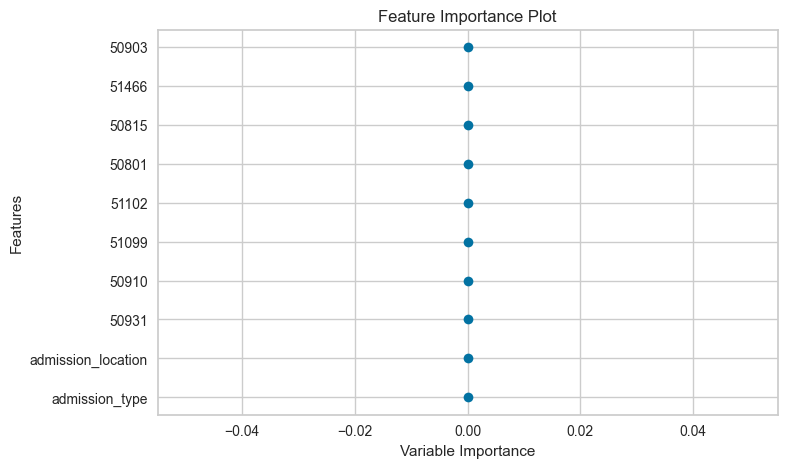

In [13]:
rf  = create_model('rf')
tuned_rf = tune_model(rf)
plot_model(estimator = tuned_rf, plot = 'feature')

In [15]:
top1_rf_model = setup(data = data[['1 Year Mortality Flag','51277']],
target = '1 Year Mortality Flag',
numeric_imputation = 'mean',
train_size=0.8,
silent = True
)

,Description,Value
0,session_id,696
1,Target,1 Year Mortality Flag
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(4060, 2)"
5,Missing Values,False
6,Numeric Features,1
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [16]:
compare_models()
rf  = create_model('rf')
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9446,0.6801,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9446,0.5787,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9446,0.6100,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9446,0.6198,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9446,0.5299,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9415,0.6867,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9415,0.6996,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9415,0.6764,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9444,0.6340,0.0000,0.0000,0.0000,0.0000,0.0000


In [17]:
top5_rf_model = setup(data = data[['1 Year Mortality Flag','51277','50863','50878','50954','50885']],
target = '1 Year Mortality Flag',
numeric_imputation = 'mean',
train_size=0.8,
silent = True
)

,Description,Value
0,session_id,1861
1,Target,1 Year Mortality Flag
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(4060, 6)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [18]:
compare_models()
rf  = create_model('rf')
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9446,0.7681,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9446,0.8273,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9446,0.7046,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9415,0.7146,0.0000,0.0000,0.0000,-0.0059,-0.0135
4,0.9446,0.7117,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9446,0.8446,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9446,0.6979,0.0526,1.0000,0.1000,0.0947,0.2230
7,0.9415,0.7732,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9444,0.8395,0.0000,0.0000,0.0000,0.0000,0.0000


In [19]:
top20_rf_model = setup(data = data[['1 Year Mortality Flag','51277','50863','50878','50954','50885','51257','50861', '51275', '50813', '51006','50822', '51256', '50802', '51260', '51274', '51279', '50821', '51246', '50884', '51268']],
target = '1 Year Mortality Flag',
numeric_imputation = 'mean',
train_size=0.8,
silent = True
)

,Description,Value
0,session_id,1838
1,Target,1 Year Mortality Flag
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(4060, 21)"
5,Missing Values,False
6,Numeric Features,20
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [20]:
compare_models()
rf  = create_model('rf')
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9477,0.8422,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9477,0.7167,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9446,0.8502,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9446,0.7395,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9446,0.7879,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9446,0.7446,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9446,0.7437,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9446,0.7926,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9475,0.6588,0.0000,0.0000,0.0000,0.0000,0.0000


In [21]:
top50_rf_model = setup(data = data[['1 Year Mortality Flag','51277','50863','50878','50954','50885','51257','50861','51275','50813','51006','50822','51256','50802','51260','51274','51279','50821','51246','50884','51268','52111','51222','50963','50931','51221','51265','50808','50818','50862','51287','50909','51003','51082','51237','50908','51100','51233','51009','50883','51007','50804','51249','50902','51250','51200','50816','50911','51248','50825','50998']],
target = '1 Year Mortality Flag',
numeric_imputation = 'mean',
train_size=0.8,
silent = True
)

,Description,Value
0,session_id,7033
1,Target,1 Year Mortality Flag
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(4060, 51)"
5,Missing Values,False
6,Numeric Features,50
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [22]:
compare_models()
rf  = create_model('rf')
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9446,0.7262,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9446,0.8159,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9446,0.8321,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9446,0.7719,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9446,0.6442,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9446,0.6907,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9446,0.8356,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9446,0.8322,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9475,0.8250,0.0000,0.0000,0.0000,0.0000,0.0000


In [61]:
data.corr().to_csv('correlations_1.14.23.csv')
data_drop_sodium_mchc.corr().to_csv('correlation_nosodiummchc_1.14.23.csv')

In [14]:
import seaborn as sn 
import matplotlib.pyplot as plt

In [15]:
corr_matrix = data.corr()

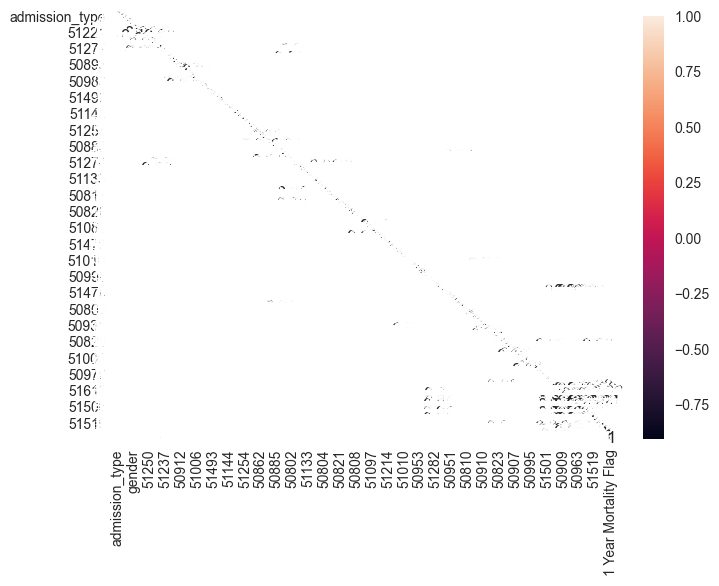

In [16]:
sn.heatmap(corr_matrix, annot=True)
plt.show()